Descriptive Analysis Notebook

In [7]:
#key imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

## Math EDA

In [8]:
mat_train = pd.read_csv('../data/math_train.csv')

In [9]:
mat_train.describe()

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
count,316.000000,316.000000,316.000000,316.000000,316.000000,316.000000,316.000000,316.000000,316.000000,316.000000,316.000000,316.000000,316.000000,316.000000,316.000000,316.000000
mean,16.743671,2.734177,2.544304,1.430380,2.047468,0.335443,3.943038,3.218354,3.161392,1.500000,2.344937,3.518987,5.905063,10.933544,10.651899,10.325949
std,1.270217,1.080375,1.078476,0.688842,0.836258,0.735588,0.885464,1.020323,1.119480,0.903257,1.296395,1.410714,8.422033,3.216823,3.755930,4.590337
min,15.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,5.000000,0.000000,0.000000
25%,16.000000,2.000000,2.000000,1.000000,1.000000,0.000000,4.000000,3.000000,2.000000,1.000000,1.000000,3.000000,0.000000,8.000000,9.000000,8.000000
50%,17.000000,3.000000,3.000000,1.000000,2.000000,0.000000,4.000000,3.000000,3.000000,1.000000,2.000000,4.000000,4.000000,11.000000,11.000000,11.000000
75%,18.000000,4.000000,3.000000,2.000000,2.000000,0.000000,5.000000,4.000000,4.000000,2.000000,3.000000,5.000000,8.000000,13.000000,13.000000,13.000000
max,22.000000,4.000000,4.000000,4.000000,4.000000,3.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,75.000000,19.000000,19.000000,20.000000


In [10]:
mat_train.describe(include=['object'])

,school,sex,address,famsize,Pstatus,Mjob,Fjob,reason,guardian,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic
count,316,316,316,316,316,316,316,316,316,316,316,316,316,316,316,316,316
unique,2,2,2,2,2,5,5,4,3,2,2,2,2,2,2,2,2
top,GP,F,U,GT3,T,other,other,course,mother,no,yes,no,no,yes,yes,yes,no
freq,282,170,247,226,284,110,178,117,219,272,191,171,159,253,298,265,207


In [11]:
mat_train.isnull().sum()

school        0
sex           0
age           0
address       0
famsize       0
Pstatus       0
Medu          0
Fedu          0
Mjob          0
Fjob          0
reason        0
guardian      0
traveltime    0
studytime     0
failures      0
schoolsup     0
famsup        0
paid          0
activities    0
nursery       0
higher        0
internet      0
romantic      0
famrel        0
freetime      0
goout         0
Dalc          0
Walc          0
health        0
absences      0
G1            0
G2            0
G3            0
dtype: int64

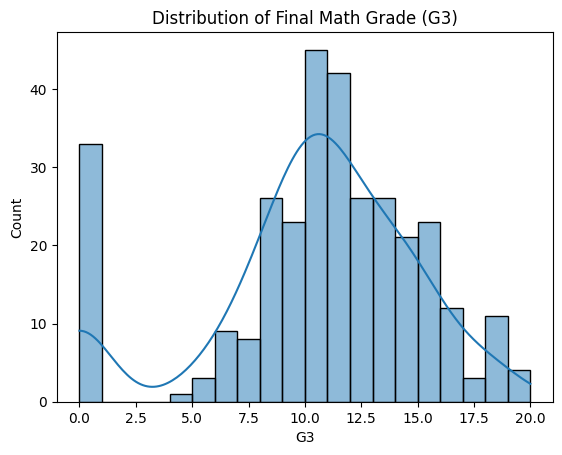

In [13]:
#Plotting the Distribution of final Math grade
import seaborn as sns
import matplotlib.pyplot as plt

sns.histplot(mat_train["G3"], kde=True, bins=20)
plt.title("Distribution of Final Math Grade (G3)")
plt.xlabel("G3")

# Save the figure in OUTPUT folder
plt.savefig("../OUTPUT/EDA/G3_dist.png", dpi=300, bbox_inches="tight")

plt.show()

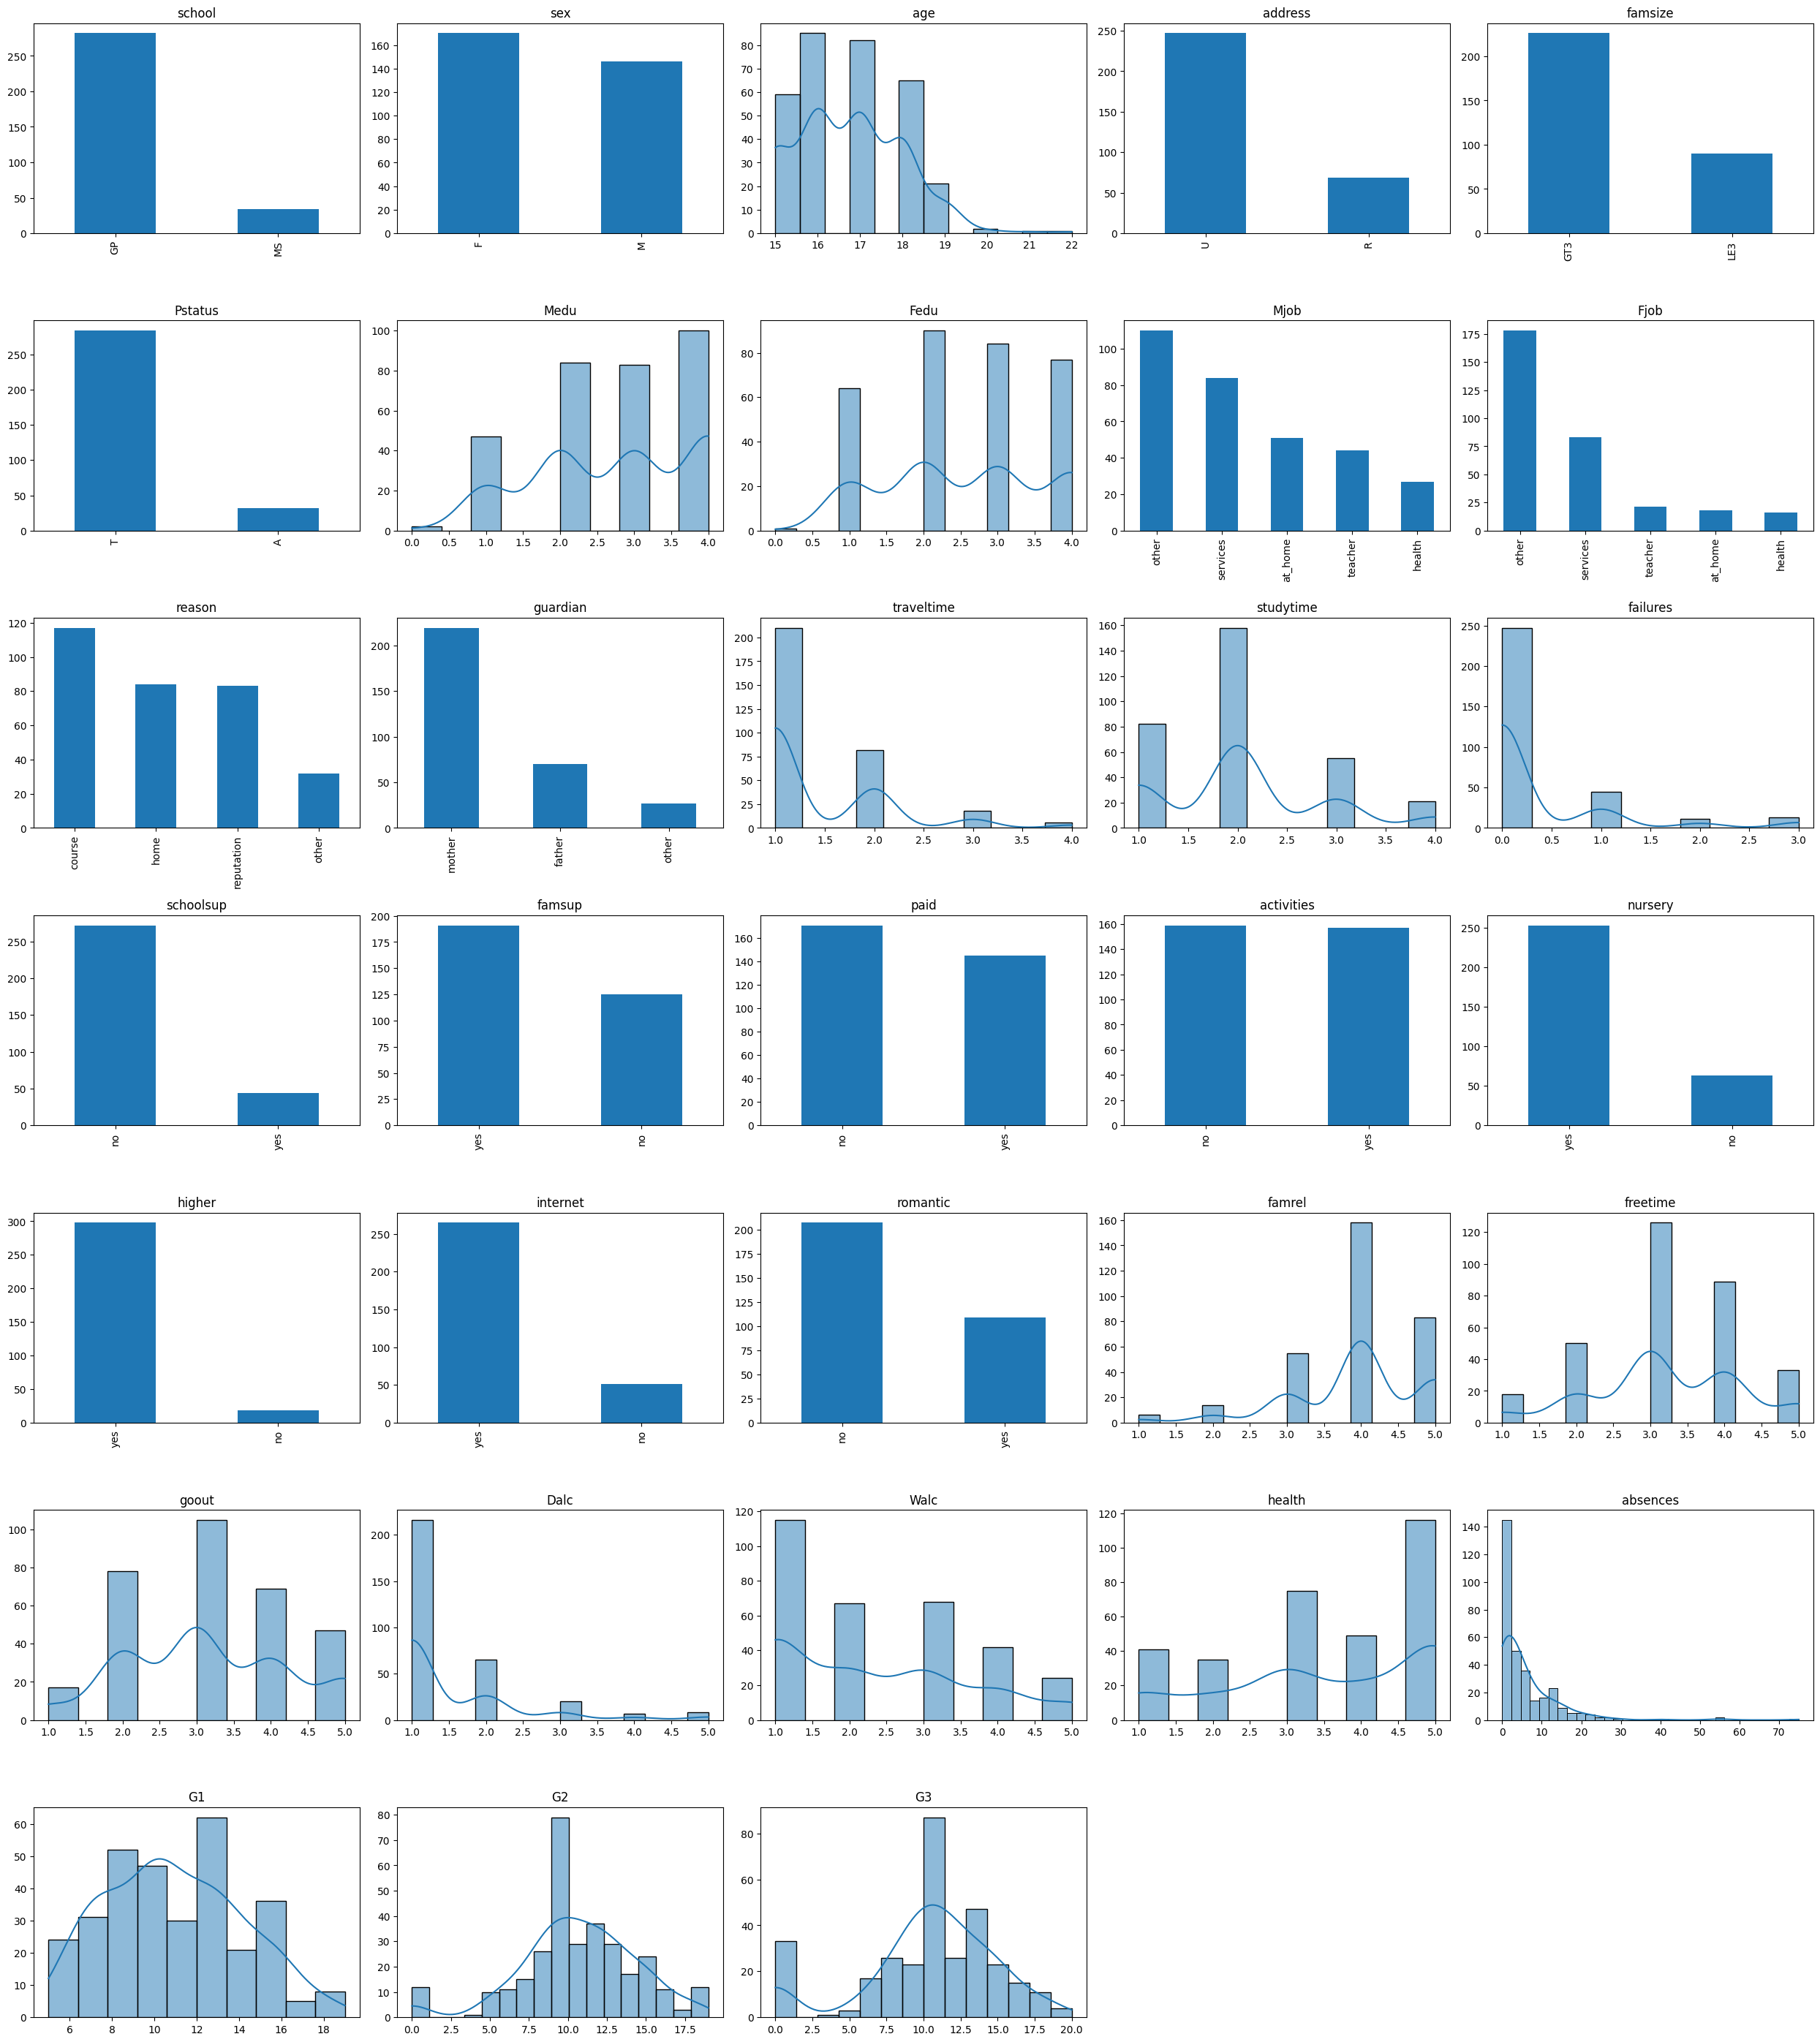

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

def plotPerColumnDistribution(df, nRows, nCols):
    fig = plt.figure(figsize=(nCols*5, nRows*4))
    for i, column in enumerate(df.columns, 1):
        ax = fig.add_subplot(nRows, nCols, i)

        if df[column].dtype in ['int64', 'float64']:
            sns.histplot(df[column], kde=True, ax=ax)
        else:
            df[column].value_counts().plot(kind='bar', ax=ax)

        ax.set_title(column)
        ax.set_xlabel("")
        ax.set_ylabel("")

        if i == nRows*nCols:
            break

    plt.tight_layout()
    plt.show()
plotPerColumnDistribution(mat_train, 10, 5)

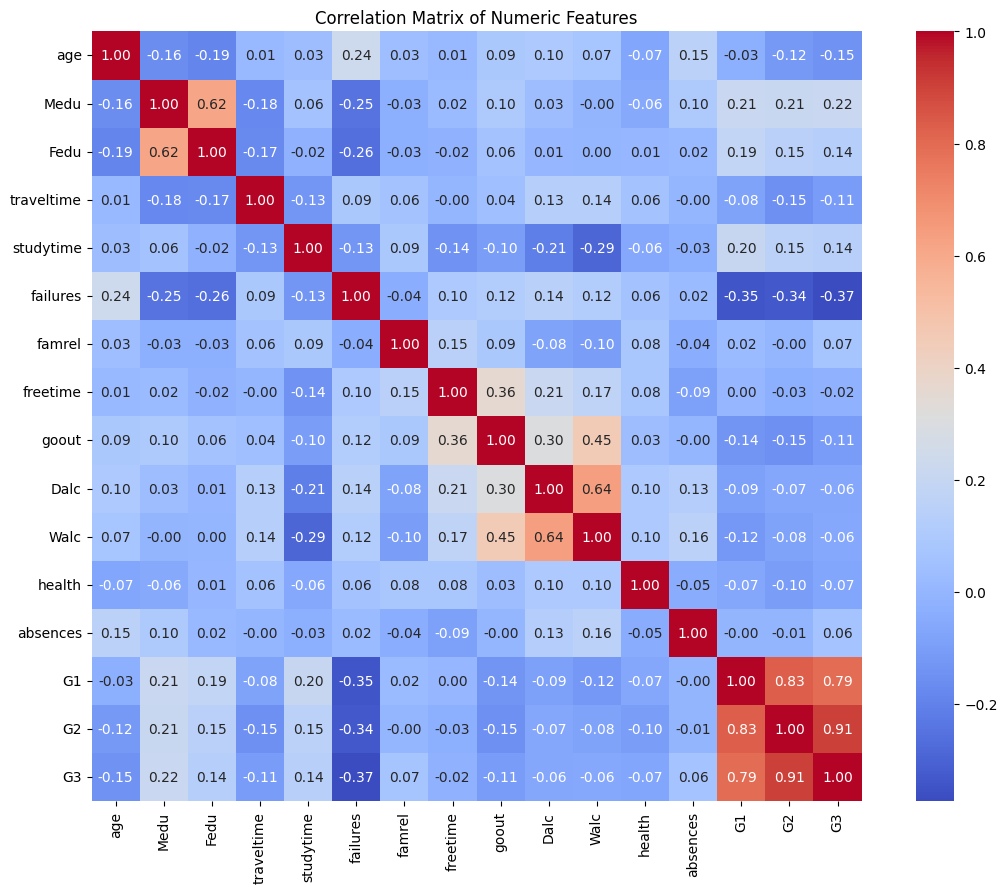

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns

# Compute correlation matrix (numeric columns only)
corr = mat_train.corr(numeric_only=True)

# Plot heatmap
plt.figure(figsize=(14, 10))
sns.heatmap(corr, annot=True, fmt=".2f", cmap="coolwarm", square=True)
plt.title("Correlation Matrix of Numeric Features")

# Save the figure in OUTPUT folder
plt.savefig("../OUTPUT/EDA/corr_mat.png", dpi=300, bbox_inches="tight")

plt.show()


G3            1.000000
G2            0.907924
G1            0.791559
Medu          0.215968
studytime     0.138200
Fedu          0.135265
famrel        0.069409
absences      0.064607
freetime     -0.015244
Walc         -0.057363
Dalc         -0.064698
health       -0.068857
goout        -0.106024
traveltime   -0.106752
age          -0.146241
failures     -0.373769
Name: G3, dtype: float64


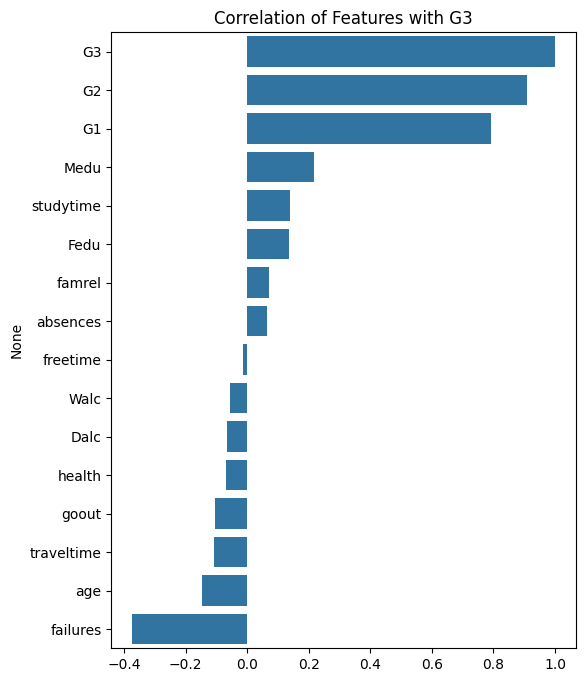

In [15]:
corr_G3 = corr["G3"].sort_values(ascending=False)
print(corr_G3)
plt.figure(figsize=(6, 8))
sns.barplot(x=corr_G3.values, y=corr_G3.index)
plt.title("Correlation of Features with G3")

# Save the figure in OUTPUT folder
plt.savefig("../OUTPUT/EDA/features_corr_G3.png", dpi=300, bbox_inches="tight")

plt.show()

Evidently, as predicted, after G3 itself, G1 and G2 respectively have the highest correlation with G3. This is because G1 and G2 are measures of academic performance through grades which are used to obtain G3. The purpose of our research project is to not look at academic grades, but instead look at social and behavioral factors that predict the final academic grade. To this end, we defined an initial hypothesis to guide our exploratory data analysis further.

Initial Hypothesis to guide Exploratory data analysis:
We expect higher study time to be associated with better grades, while students with more past failures may perform worse. This can also be inferred by the graph above. We also hypothesize that students receiving extra educational support (school support or family support) may have different performance patterns—either because support helps them improve, or because it is given to students who are already struggling. Finally, we anticipate that access to resources such as internet may positively correlate with higher academic performance.

The high correlations in the graph above also prompts us to explore, in detail, how mothers' and fathers' education affects students' final math grade. This is interesting because it suggests how familial background and education history has implications of children's academic performance.

We are eager to see if further analysis, beyond EDA and through our four machine learning models, validates or contradicts the assumptions and interests outlined in our inditial hypothesis.

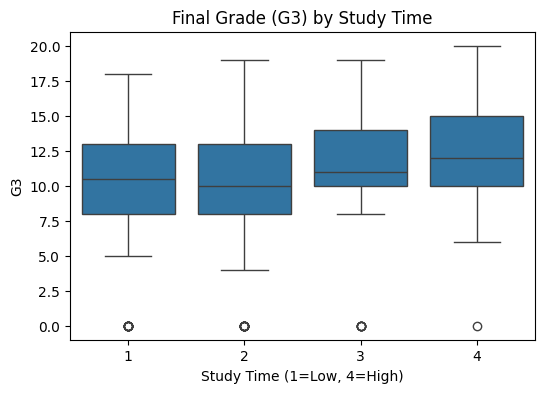

In [16]:
#we were curious to explore G3 by Study Time (Academic Effort)
#Shows whether more weekly study time improves grades.
plt.figure(figsize=(6,4))
sns.boxplot(x="studytime", y="G3", data=mat_train)
plt.title("Final Grade (G3) by Study Time")
plt.xlabel("Study Time (1=Low, 4=High)")
plt.ylabel("G3")

# Save the figure in OUTPUT folder
plt.savefig("../OUTPUT/EDA/G3_study_dist.png", dpi=300, bbox_inches="tight")

plt.show()


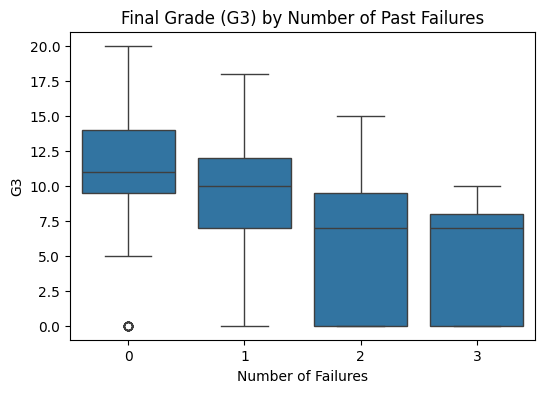

In [17]:
#we were curious to explore G3 by Past Class Failures (Academic History)
#Shows how prior failures affect final performance.
plt.figure(figsize=(6,4))
sns.boxplot(x="failures", y="G3", data=mat_train)
plt.title("Final Grade (G3) by Number of Past Failures")
plt.xlabel("Number of Failures")
plt.ylabel("G3")

# Save the figure in OUTPUT folder
plt.savefig("../OUTPUT/EDA/G3_fails_dist.png", dpi=300, bbox_inches="tight")

plt.show()


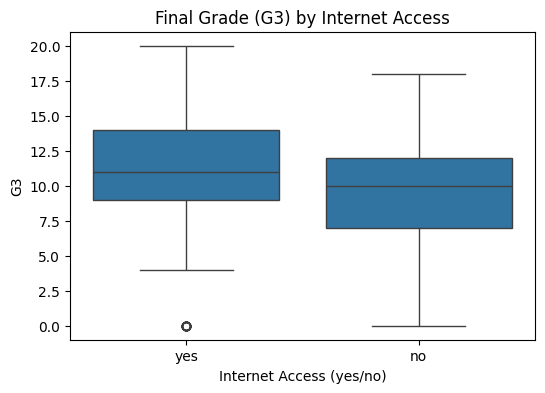

In [18]:
#we were curious to explore G3 by Internet Access (Home Resources)
#Household internet accessibility affects homework and study opportunities.
plt.figure(figsize=(6,4))
sns.boxplot(x="internet", y="G3", data=mat_train)
plt.title("Final Grade (G3) by Internet Access")
plt.xlabel("Internet Access (yes/no)")
plt.ylabel("G3")

# Save the figure in OUTPUT folder
plt.savefig("../OUTPUT/EDA/G3_internet_dist.png", dpi=300, bbox_inches="tight")

plt.show()


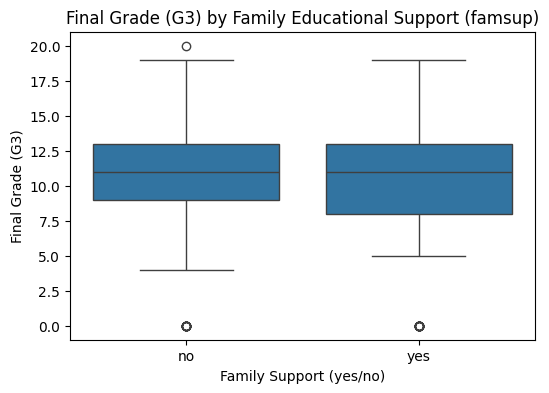

In [19]:
#we were curious to explore G3 by family support
plt.figure(figsize=(6,4))
sns.boxplot(x="famsup", y="G3", data=mat_train)
plt.title("Final Grade (G3) by Family Educational Support (famsup)")
plt.xlabel("Family Support (yes/no)")
plt.ylabel("Final Grade (G3)")

# Save the figure in OUTPUT folder
plt.savefig("../OUTPUT/EDA/G3_famsup_dist.png", dpi=300, bbox_inches="tight")

plt.show()


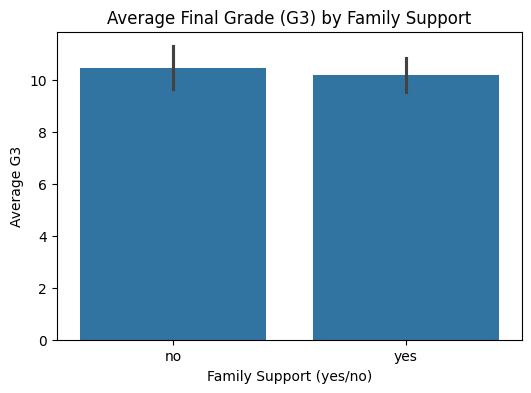

In [20]:
plt.figure(figsize=(6,4))
sns.barplot(x="famsup", y="G3", data=mat_train, estimator=np.mean)
plt.title("Average Final Grade (G3) by Family Support")
plt.xlabel("Family Support (yes/no)")
plt.ylabel("Average G3")

# Save the figure in OUTPUT folder
plt.savefig("../OUTPUT/EDA/avg_G3_famsup.png", dpi=300, bbox_inches="tight")

plt.show()

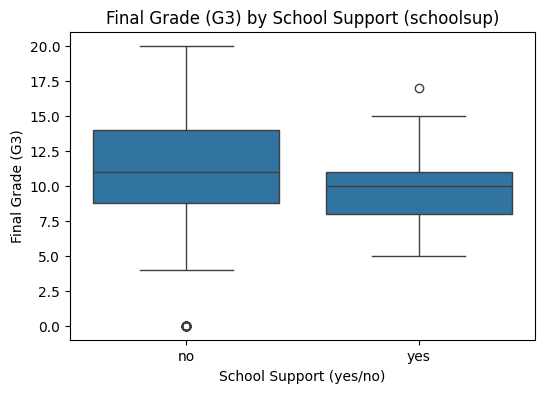

In [21]:
#we were curious to explore g3 by extra support
plt.figure(figsize=(6,4))
sns.boxplot(x="schoolsup", y="G3", data=mat_train)
plt.title("Final Grade (G3) by School Support (schoolsup)")
plt.xlabel("School Support (yes/no)")
plt.ylabel("Final Grade (G3)")

# Save the figure in OUTPUT folder
plt.savefig("../OUTPUT/EDA/G3_schoolsup_dist.png", dpi=300, bbox_inches="tight")

plt.show()


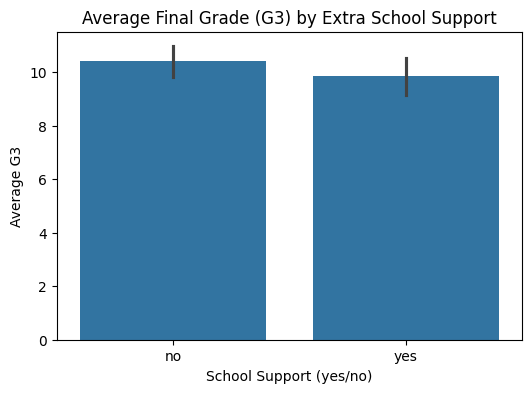

In [22]:
plt.figure(figsize=(6,4))
sns.barplot(x="schoolsup", y="G3", data=mat_train, estimator=np.mean)
plt.title("Average Final Grade (G3) by Extra School Support")
plt.xlabel("School Support (yes/no)")
plt.ylabel("Average G3")

# Save the figure in OUTPUT folder
plt.savefig("../OUTPUT/EDA/avg_G3_schoolsup.png", dpi=300, bbox_inches="tight")

plt.show()


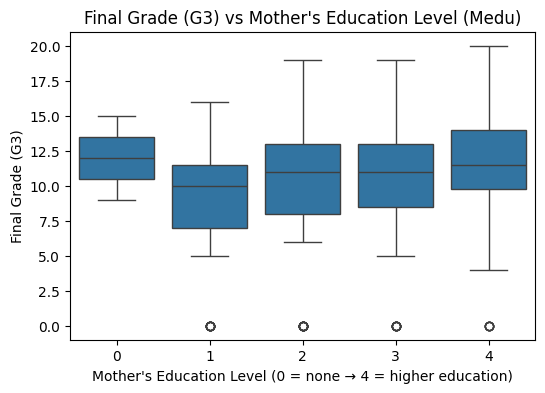

In [23]:
#we are curious to explore G3 in relation to mother's education
plt.figure(figsize=(6,4))
sns.boxplot(data=mat_train, x="Medu", y="G3")
plt.title("Final Grade (G3) vs Mother's Education Level (Medu)")
plt.xlabel("Mother's Education Level (0 = none → 4 = higher education)")
plt.ylabel("Final Grade (G3)")

# Save the figure in OUTPUT folder
plt.savefig("../OUTPUT/EDA/G3_medu.png", dpi=300, bbox_inches="tight")

plt.show()

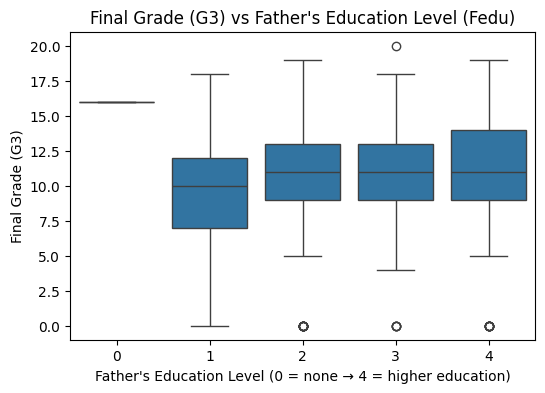

In [24]:
#we are curious to explore G3 in relation to father's education
plt.figure(figsize=(6,4))
sns.boxplot(data=mat_train, x="Fedu", y="G3")
plt.title("Final Grade (G3) vs Father's Education Level (Fedu)")
plt.xlabel("Father's Education Level (0 = none → 4 = higher education)")
plt.ylabel("Final Grade (G3)")

# Save the figure in OUTPUT folder
plt.savefig("../OUTPUT/EDA/G3_fedu.png", dpi=300, bbox_inches="tight")

plt.show()




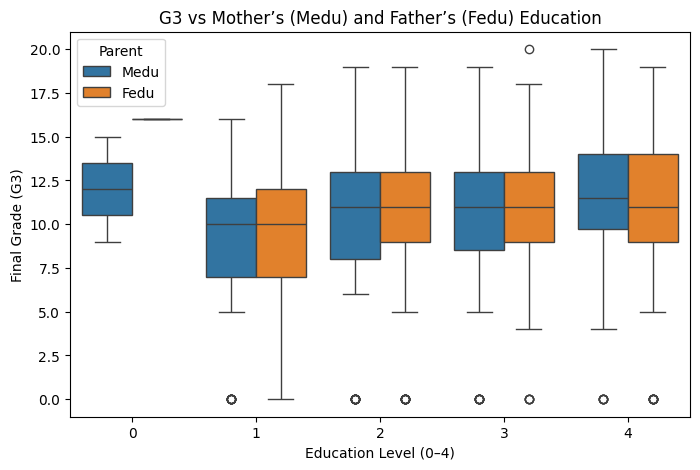

In [25]:
#comparing the two sets of box plots side by side reveals that for both parents at each
# education level, students had the same median final grade.
plt.figure(figsize=(8,5))
sns.boxplot(
    data=mat_train.melt(id_vars="G3", value_vars=["Medu", "Fedu"],
                        var_name="Parent", value_name="Education"),
    x="Education", y="G3", hue="Parent"
)

plt.title("G3 vs Mother’s (Medu) and Father’s (Fedu) Education")
plt.xlabel("Education Level (0–4)")
plt.ylabel("Final Grade (G3)")
plt.legend(title="Parent")

# Save the figure in OUTPUT folder
plt.savefig("../OUTPUT/EDA/G3_medu_fedu.png", dpi=300, bbox_inches="tight")

plt.show()
